https://colab.research.google.com/github/Gurobi/modeling-examples/blob/master/facility_location/facility_location.ipynb

In [1]:
import math
math.comb(1274, 2)

810901

길찾기는 하루 1만건 가능함.  
만약 서초3구 모든 경계구사이 거리 다 구하려면 81만 개 필요  
-> 가장 가까운 지점까지 시간만 구하고 그거 토대로 최적화하는법 연구(메타휴리스틱)  

카카오 길찾기
https://developers.kakaomobility.com/docs/navi-api/directions/  
  
rest api 키  
	f8df45aec27d46580551f1fe6b0bcadd  

scikit-opt
https://scikit-opt.github.io/scikit-opt/#/en/README?id=_2-genetic-algorithm

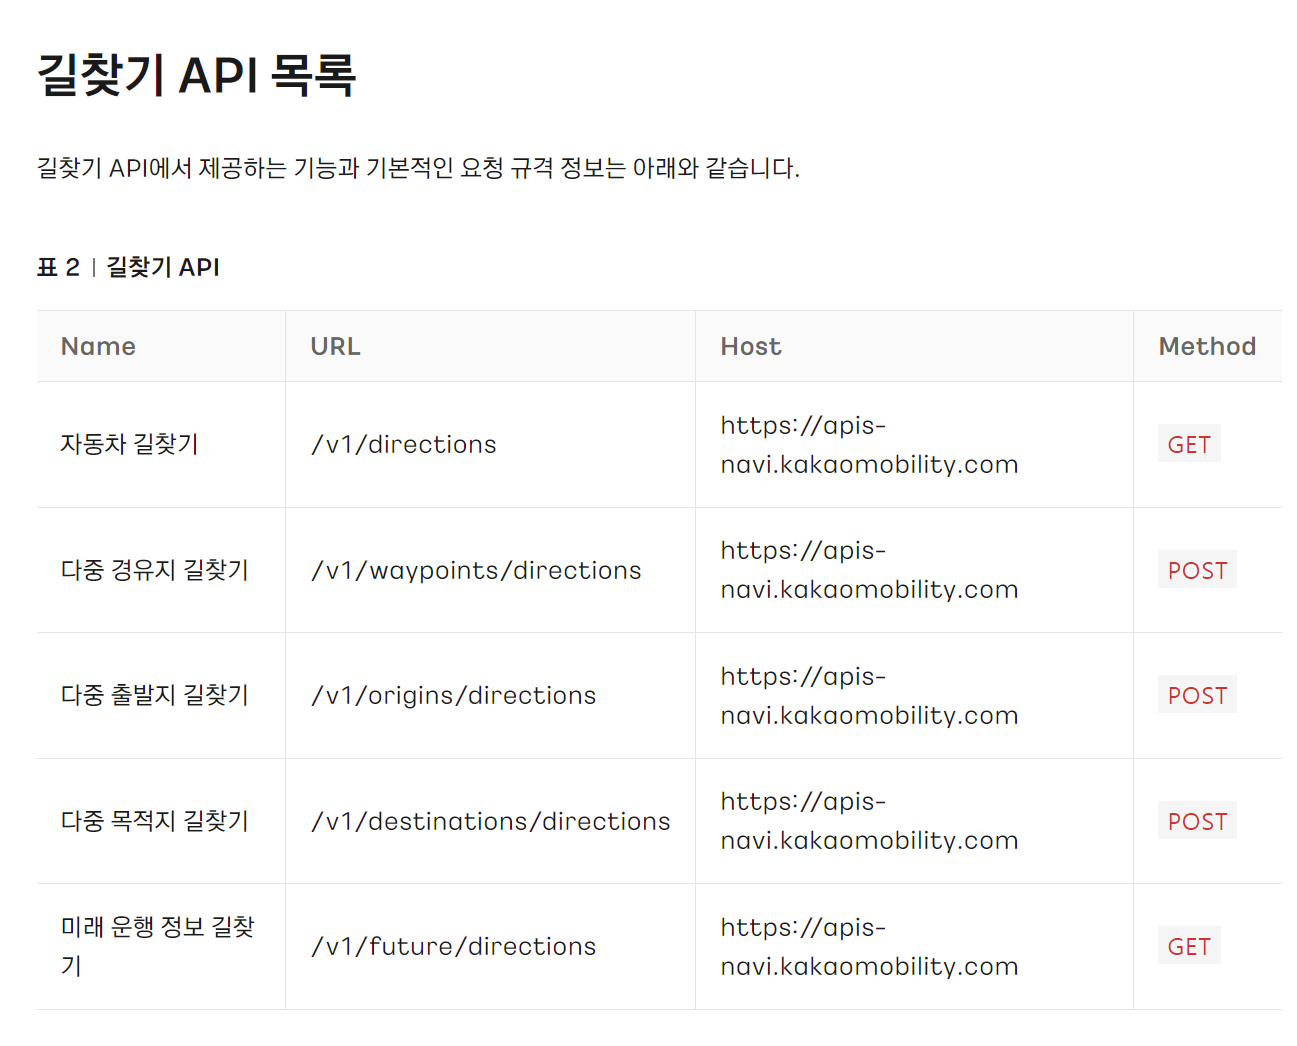

In [2]:
import pickle

# load
with open('./data/강남3구_집계구_경계_중심.pickle', 'rb') as f:
    강남3구_집계구_경계_중심 = pickle.load(f)
강남3구_집계구_경계_중심.reset_index(drop = True, inplace = True)
강남3구_집계구_경계_중심

,gu,TOT_REG_CD,geometry,count,centroid
0,11220,11220520010107,"POLYGON ((127.02654 37.48948, 127.02601 37.489...",53.0,POINT (127.02621 37.48978)
1,11220,11220590020102,"POLYGON ((127.00201 37.50790, 127.00223 37.507...",54.0,POINT (127.00173 37.50763)
2,11220,11220670020002,"POLYGON ((127.03551 37.46515, 127.03539 37.464...",114.0,POINT (127.04780 37.44425)
3,11220,11220680030001,"POLYGON ((127.07618 37.45624, 127.07639 37.456...",116.0,POINT (127.06819 37.44481)
4,11220,11220540010106,"POLYGON ((127.02177 37.50081, 127.02166 37.500...",60.0,POINT (127.02117 37.50097)
...,...,...,...,...,...
2699,11240,11240540010801,"POLYGON ((127.14493 37.48965, 127.14463 37.488...",146.0,POINT (127.14401 37.48973)
2700,11240,11240590030105,"POLYGON ((127.14341 37.51721, 127.14356 37.517...",63.0,POINT (127.14088 37.51645)
2701,11240,11240590040102,"POLYGON ((127.13568 37.51516, 127.13544 37.514...",51.0,POINT (127.13466 37.51537)
2702,11240,11240820010202,"POLYGON ((127.14042 37.48346, 127.14018 37.482...",66.0,POINT (127.13148 37.47358)


In [3]:
base_data = 강남3구_집계구_경계_중심.loc[강남3구_집계구_경계_중심['gu']=='11230', ['count', 'centroid']]
base_data

,count,centroid
673,68.0,POINT (127.06949 37.49502)
674,74.0,POINT (127.06437 37.48096)
675,55.0,POINT (127.06485 37.49352)
676,80.0,POINT (127.06835 37.49334)
677,60.0,POINT (127.04056 37.49036)
...,...,...
1494,72.0,POINT (127.09537 37.48902)
1495,80.0,POINT (127.09729 37.46124)
1496,134.0,POINT (127.07738 37.49371)
1497,98.0,POINT (127.05063 37.51656)


In [4]:
import geopandas as gpd
data_주차장위치 = gpd.read_file('./data/data_주차장위치.geojson',driver='GeoJSON')
data_주차장위치 = data_주차장위치.loc[data_주차장위치['구_코드']=='11230', :]
data_주차장위치

ERROR 1: PROJ: proj_create_from_database: Open of /home/yspark/miniconda3/envs/env_tg_db/share/proj failed


,구_코드,행정동_이름,geometry
19,11230,논현2동,"POLYGON ((127.03472 37.50757, 127.03392 37.507..."
20,11230,대치1동,"POLYGON ((127.06084 37.49858, 127.06100 37.498..."
21,11230,세곡동,"POLYGON ((127.10374 37.48517, 127.10376 37.485..."
22,11230,논현1동,"POLYGON ((127.02451 37.50449, 127.02448 37.504..."
23,11230,대치4동,"POLYGON ((127.05286 37.49631, 127.05286 37.496..."
24,11230,신사동,"POLYGON ((127.02156 37.53553, 127.02424 37.531..."
25,11230,삼성1동,"POLYGON ((127.06757 37.52164, 127.06759 37.520..."
26,11230,삼성2동,"POLYGON ((127.04912 37.50456, 127.04899 37.504..."
27,11230,역삼1동,"POLYGON ((127.03260 37.48971, 127.03230 37.489..."
28,11230,역삼2동,"POLYGON ((127.04675 37.49420, 127.04672 37.494..."


In [5]:
# data_주차장위치.to_file('./data/data_주차장위치.geojson', driver = 'GeoJSON')

In [6]:
data_주차장위치['centroid'] = data_주차장위치['geometry'].centroid
data_주차장위치

/tmp/ipykernel_26993/3200636253.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data_주차장위치['centroid'] = data_주차장위치['geometry'].centroid


,구_코드,행정동_이름,geometry,centroid
19,11230,논현2동,"POLYGON ((127.03472 37.50757, 127.03392 37.507...",POINT (127.03621 37.51524)
20,11230,대치1동,"POLYGON ((127.06084 37.49858, 127.06100 37.498...",POINT (127.05909 37.49336)
21,11230,세곡동,"POLYGON ((127.10374 37.48517, 127.10376 37.485...",POINT (127.10431 37.47066)
22,11230,논현1동,"POLYGON ((127.02451 37.50449, 127.02448 37.504...",POINT (127.02650 37.51187)
23,11230,대치4동,"POLYGON ((127.05286 37.49631, 127.05286 37.496...",POINT (127.05475 37.50157)
24,11230,신사동,"POLYGON ((127.02156 37.53553, 127.02424 37.531...",POINT (127.02018 37.52608)
25,11230,삼성1동,"POLYGON ((127.06757 37.52164, 127.06759 37.520...",POINT (127.06080 37.51530)
26,11230,삼성2동,"POLYGON ((127.04912 37.50456, 127.04899 37.504...",POINT (127.04878 37.51186)
27,11230,역삼1동,"POLYGON ((127.03260 37.48971, 127.03230 37.489...",POINT (127.03550 37.50084)
28,11230,역삼2동,"POLYGON ((127.04675 37.49420, 127.04672 37.494...",POINT (127.04490 37.49848)


In [7]:
import pickle

# load
with open('./data/수리적최적화_지점간거리.pickle', 'rb') as f:
    dict_주차장_고객_거리 = pickle.load(f)
len(dict_주차장_고객_거리)

181168

In [8]:
# from src.주차배치최적화 import 주차장거리_해계산기
# from hyperopt import hp, Trials, tpe, fmin
# 주차장개수 = 4
# solver = 주차장거리_해계산기(data_고객위치 = base_data, data_주차장위치 = data_주차장위치,
#                     dict_주차장_고객_거리 = dict_주차장_고객_거리, 
#                     주차장개수 = 주차장개수)
# space = {'결정변수': [hp.randint(str(x), len(solver.data_주차장위치)) for x in range(주차장개수)]}
# trials = Trials()
# best = fmin(fn= solver.hopt_func,
#             space= space,
#             algo= tpe.suggest,
#             max_evals = 10000,
#             trials= trials,
#            # timeout = 68400
#            )

# # 최적의 하이퍼파라미터 조합
# best

In [9]:
from src.hyperopt import hyperopt_병렬처리

In [10]:
solver = hyperopt_병렬처리(주차장개수 = 4, 
                       data_고객위치 = base_data, 
                       data_주차장위치 = data_주차장위치.loc[:, ['centroid']], 
                       dict_주차장_고객_거리 = dict_주차장_고객_거리, num_cpus = 30)

2024-04-03 10:21:04,525	INFO worker.py:1752 -- Started a local Ray instance.


In [11]:
solver.최적화실행()

  0%|          | 2/10000 [00:00<41:45,  3.99trial/s, best loss: 74654613.0]
(raylet) WARNING: 28 PYTHON worker processes have been started on node: bebb8fef462b8d4958d725506df7bb7a90cc5119f7cdbe33d026b361 with address: 172.22.137.205. This could be a result of using a large number of actors, or due to tasks blocked in ray.get() calls (see https://github.com/ray-project/ray/issues/3644 for some discussion of workarounds).
  0%|          | 2/10000 [00:01<1:25:58,  1.94trial/s, best loss: 53000799.0] [repeated 31x across cluster]
(raylet) WARNING: 50 PYTHON worker processes have been started on node: bebb8fef462b8d4958d725506df7bb7a90cc5119f7cdbe33d026b361 with address: 172.22.137.205. This could be a result of using a large number of actors, or due to tasks blocked in ray.get() calls (see https://github.com/ray-project/ray/issues/3644 for some discussion of workarounds). [repeated 4x across cluster]
  7%|▋         | 735/10000 [18:44<3:57:53,  1.54s/trial, best loss: 49143550.0] [repeated

[({'0': 17, '1': 9, '2': 18, '3': 8}, 48495580.0),
 ({'0': 8, '1': 18, '2': 12, '3': 17}, 49143550.0),
 ({'0': 12, '1': 17, '2': 18, '3': 8}, 49143550.0),
 ({'0': 17, '1': 10, '2': 9, '3': 18}, 49300975.0),
 ({'0': 18, '1': 10, '2': 17, '3': 9}, 49300975.0),
 ({'0': 9, '1': 8, '2': 18, '3': 17}, 48495580.0),
 ({'0': 9, '1': 8, '2': 18, '3': 17}, 48495580.0),
 ({'0': 9, '1': 10, '2': 17, '3': 18}, 49300975.0),
 ({'0': 8, '1': 18, '2': 9, '3': 17}, 48495580.0),
 ({'0': 18, '1': 9, '2': 17, '3': 8}, 48495580.0),
 ({'0': 8, '1': 18, '2': 9, '3': 17}, 48495580.0),
 ({'0': 8, '1': 17, '2': 9, '3': 18}, 48495580.0),
 ({'0': 17, '1': 9, '2': 18, '3': 8}, 48495580.0),
 ({'0': 12, '1': 8, '2': 17, '3': 18}, 49143550.0),
 ({'0': 9, '1': 17, '2': 18, '3': 3}, 49439636.0),
 ({'0': 8, '1': 18, '2': 9, '3': 17}, 48495580.0),
 ({'0': 17, '1': 18, '2': 8, '3': 12}, 49143550.0),
 ({'0': 9, '1': 8, '2': 18, '3': 17}, 48495580.0),
 ({'0': 9, '1': 8, '2': 17, '3': 18}, 48495580.0),
 ({'0': 17, '1': 8, '2':

In [13]:
from src.주차배치최적화 import 주차장거리_해계산기
ㅁ = 주차장거리_해계산기(주차장개수 = 4, 
                       data_고객위치 = base_data, 
                       data_주차장위치 = data_주차장위치.loc[:, ['centroid']], 
                       dict_주차장_고객_거리 = dict_주차장_고객_거리)

In [14]:
ㅁ._01_해입력([8, 9, 17, 18])

입력해:  [27, 28, 39, 40]


In [12]:
asdg

NameError: name 'asdg' is not defined

In [ ]:
49000000*153/(153+31)

In [ ]:
31

In [ ]:
153

In [ ]:
패 = 4/10
승 = 6/10
승리확률 = 0
승리확률 += 패*패*승*승*승
print('누적(+패패승승승)', 승리확률)
승리확률 += 패*패*승*승*승
print('누적(+패승패승승)', 승리확률)
승리확률 += 패*패*승*승*승
print('누적(+패승승패승)', 승리확률)
승리확률 += 패*승*승*승
print('누적(+패승승승)', 승리확률)
승리확률 += 패*패*승*승*승
print('누적(+승패패승승)', 승리확률)
승리확률 += 패*패*승*승*승
print('누적(+승패승패승)', 승리확률)
승리확률 += 패*승*승*승
print('누적(+승패승승)', 승리확률)
승리확률 += 패*패*승*승*승
print('누적(+승승패패승)', 승리확률)
승리확률 += 패*승*승*승
print('누적(+승승패승)', 승리확률)
승리확률 += 승*승*승
print('누적(+승승승)', 승리확률)